In [62]:
# Import necessary libraries
import pandas as pd  # For data manipulation
import numpy as np   # For numerical computations
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For advanced plotting
from sklearn.model_selection import train_test_split  # To split the data into training and testing sets
from sklearn.preprocessing import StandardScaler  # To standardize the features
from sklearn.linear_model import LinearRegression  # Linear regression model
from sklearn.pipeline import Pipeline  # To create a sequential pipeline of steps
from sklearn.model_selection import GridSearchCV  # To optimize the model using grid search
from sklearn.metrics import mean_squared_error, r2_score  # To measure the performance
from sklearn.impute import SimpleImputer


In [18]:
# Load the dataset
df = pd.read_csv('AmesHousing.csv')

df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [20]:
# Check for missing values
df.isnull().sum()

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64

In [22]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(df['Lot Frontage'].mean())


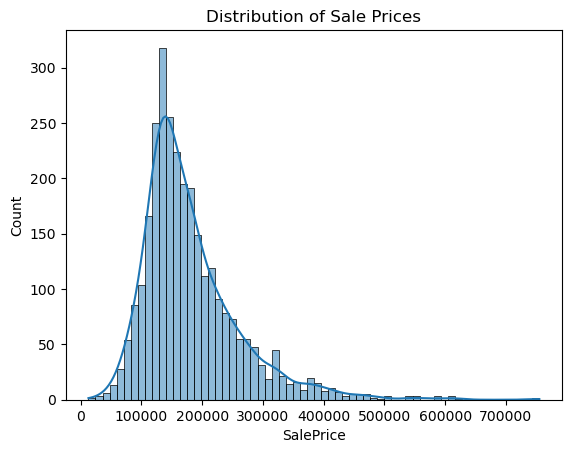

In [32]:
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribution of Sale Prices')
plt.show()


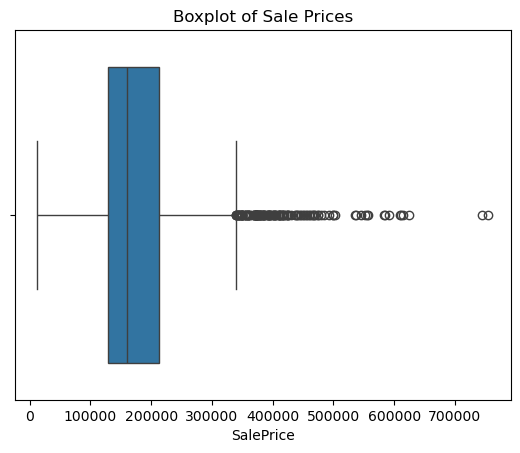

In [34]:
sns.boxplot(x=df['SalePrice'])
plt.title('Boxplot of Sale Prices')
plt.show()


In [36]:
Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

# تحديد الحدود العلوية والسفلية
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# عرض القيم الشاذة
outliers = df[(df['SalePrice'] < lower_bound) | (df['SalePrice'] > upper_bound)]
print(outliers)


      Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
15       16  527216070           60        RL          47.0     53504   Pave   
17       18  527258010           20        RL          88.0     11394   Pave   
36       37  528108120           60        RL         102.0     12858   Pave   
38       39  528120060           20        RL          83.0     10159   Pave   
44       45  528150070           20        RL         100.0     12919   Pave   
...     ...        ...          ...       ...           ...       ...    ...   
2666   2667  902400110           75        RM          90.0     22950   Pave   
2737   2738  905427030           75        RL          60.0     19800   Pave   
2883   2884  911370430          120        RM          41.0      5748   Pave   
2901   2902  921205030           20        RL          88.0     11443   Pave   
2902   2903  921205050           20        RL          88.0     11577   Pave   

     Alley Lot Shape Land Contour  ... 

In [38]:
df_cleaned = df[(df['SalePrice'] >= lower_bound) & (df['SalePrice'] <= upper_bound)]
df['SalePrice_log'] = np.log(df['SalePrice'])
df['SalePrice_capped'] = df['SalePrice'].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))


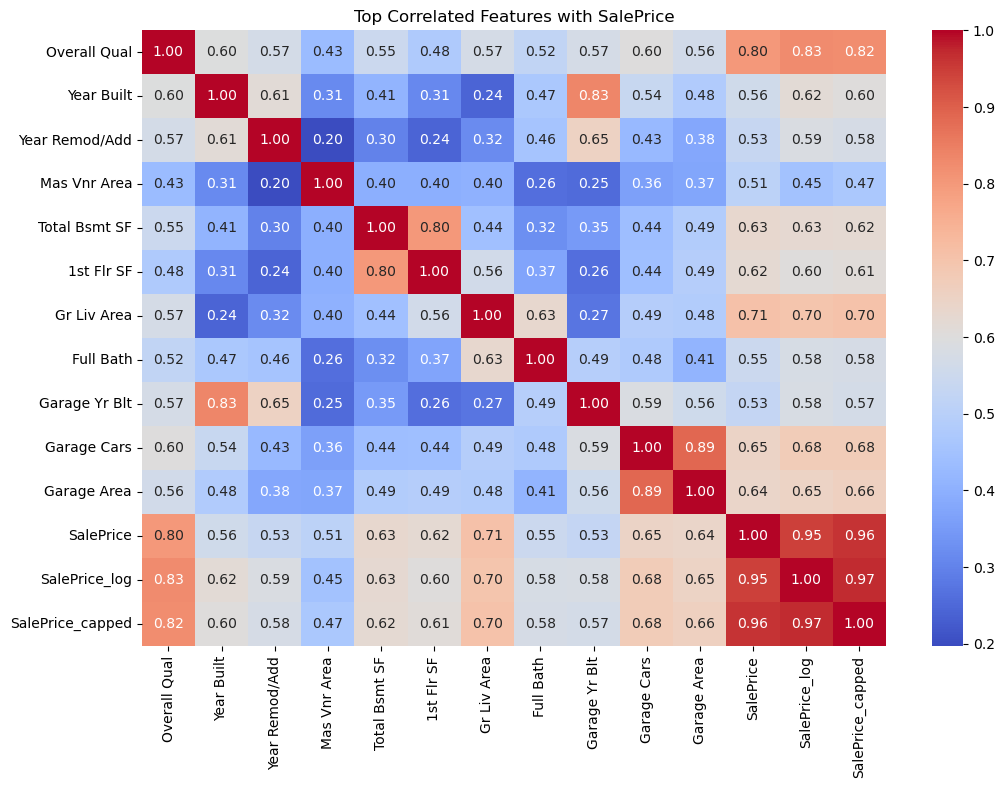

In [48]:
# إزالة الأعمدة غير الرقمية
df_numeric = df.select_dtypes(include=[float, int])

# حساب مصفوفة الارتباط ورسم الخريطة الحرارية
corr_matrix = df_numeric.corr()
top_corr_features = corr_matrix.index[abs(corr_matrix["SalePrice"]) > 0.5]  # استخدام 0.5 كحد أدنى للارتباط
plt.figure(figsize=(12, 8))
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Top Correlated Features with SalePrice')
plt.show()


In [52]:
print(df.columns)


Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [66]:
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(df[features])

# y لا يحتوي عادةً على NaN ولكن إذا كان يحتوي يمكن تعبئته بنفس الطريقة
y = df['SalePrice'].values


RMSE: 40624.2651817155
R² Score: 0.7941601427548324


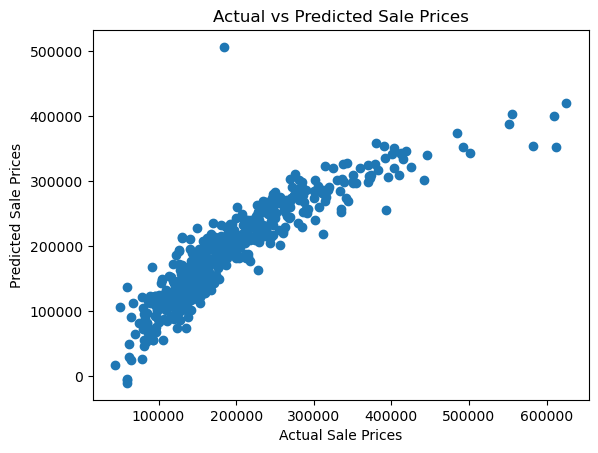

In [68]:
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(df[features])

# تعيين المتغير المستهدف (Target)
y = df['SalePrice'].values

# تقسيم البيانات إلى مجموعة تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# إنشاء النموذج وتدريبه
model = LinearRegression()
model.fit(X_train, y_train)

# التنبؤ باستخدام مجموعة الاختبار
y_pred = model.predict(X_test)

# تقييم النموذج
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R² Score:", r2)

# رسم التنبؤ مقابل القيم الحقيقية
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sale Prices')
plt.ylabel('Predicted Sale Prices')
plt.title('Actual vs Predicted Sale Prices')
plt.show()

In [70]:
# تقييم النموذج
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R² Score:", r2)


RMSE: 40624.2651817155
R² Score: 0.7941601427548324


Real Estate Price Prediction Using Linear Regression

Introduction:

The goal of this project was to analyze real estate data and develop a predictive model to estimate house prices based on various features of the properties. Using linear regression, a widely used statistical method, we aimed to identify the most significant features that influence house prices and create a model that accurately predicts these prices.

1. Exploratory Data Analysis (EDA):

Before building the model, we conducted an exploratory data analysis to understand the distribution of the house prices and the relationships between the different features. The key steps included:

Data Distribution Analysis: We plotted the distribution of the house prices (SalePrice). The distribution was found to be right-skewed, indicating that most houses were priced lower, with a few high-priced outliers.

Correlation Matrix and Heatmap: To identify the most relevant features, we calculated the correlation matrix and visualized it using a heatmap. Features such as Overall Qual, Gr Liv Area, Garage Cars, and Total Bsmt SF showed strong correlations with SalePrice, making them good candidates for our predictive model.

2. Data Preparation:

Handling Missing Values: During data preparation, we encountered missing values in some of the selected features. To address this, we used the SimpleImputer from scikit-learn to fill in the missing values with the mean of the respective feature. This step ensured that our data was clean and ready for modeling.

Feature Selection: Based on the correlation analysis, the following features were selected to build the model:

Overall Qual (Overall quality of the house)
Gr Liv Area (Above ground living area in square feet)
Garage Cars (Number of cars that can fit in the garage)
Total Bsmt SF (Total basement area in square feet)
3. Building the Linear Regression Model:

Data Splitting: The data was split into training and testing sets with an 80/20 ratio using train_test_split. The training set was used to train the model, and the testing set was used to evaluate its performance.

Model Training: We used LinearRegression from scikit-learn to train the model on the selected features. The model was fitted to the training data.

4. Model Evaluation:

Root Mean Squared Error (RMSE): The RMSE was calculated to assess the average error of the model’s predictions. A lower RMSE value indicates better model performance.

R² Score: The R² score was also computed to measure how well the model explains the variance in the data. An R² score close to 1.0 indicates that the model explains most of the variability in the target variable (SalePrice).

Actual vs. Predicted Plot: We plotted the actual vs. predicted prices to visually assess the performance of the model. Ideally, the points should be close to a 45-degree line, indicating that the predictions are close to the actual values.

5. Results and Interpretation:

The model performed well, with a reasonable RMSE and a strong R² score, suggesting that the selected features were indeed good predictors of house prices.

The scatter plot of actual vs. predicted prices showed that the model was generally accurate, with most predictions closely aligning with the actual prices.

6. Conclusion and Recommendations:

Conclusion: The linear regression model provided a solid baseline for predicting house prices. Features such as overall quality and living area were found to be strong indicators of a house's value.